In [2]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

%matplotlib widget
plt.style.use('RasmusStyle.mplstyle')
%matplotlib widget

import os
# import csv
import math

import datetime
from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[:-math.ceil(meanWidth)+1]
def rnTime3(t,meanWidth):
    return t[math.ceil(meanWidth)+1:]

saveFigures is set to: True
Done loading packages


In [3]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

In [19]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir


df = pd.read_csv(latestdir+'/Antigentests_pr_dag.csv',delimiter = ';')

df['Dato'] =  pd.to_datetime(df.Dato,format='%Y-%m-%d')

In [20]:
df.head()

,Dato,AG_testede,AG_pos,AGpos_PCRkonf,Andel_AGpos_PCRkonf_pct,AGpos_minusPCRkonf,Andel_AGminusPCRkonf_pct,AGpos_PCRpos,AGposPCRneg,AGnegPCRpos,AGnegPCRneg
0,2021-02-01,5742,8,4,50,4,50,2,2,2,294
1,2021-02-02,5373,9,5,"55,5555555555556",4,"44,4444444444444",5,0,5,305
2,2021-02-03,5723,11,6,"54,5454545454545",5,"45,4545454545455",6,0,6,344
3,2021-02-04,5191,8,3,"37,5",5,"62,5",3,0,5,328
4,2021-02-05,4942,7,5,"71,4285714285714",2,"28,5714285714286",4,1,6,280


In [26]:
sensHard = 0.55
specHard = 0.9995

curDates = df.Dato.values 
posRate = df.AG_pos / df.AG_testede

posBackground = (posRate - (1-specHard))/sensHard 

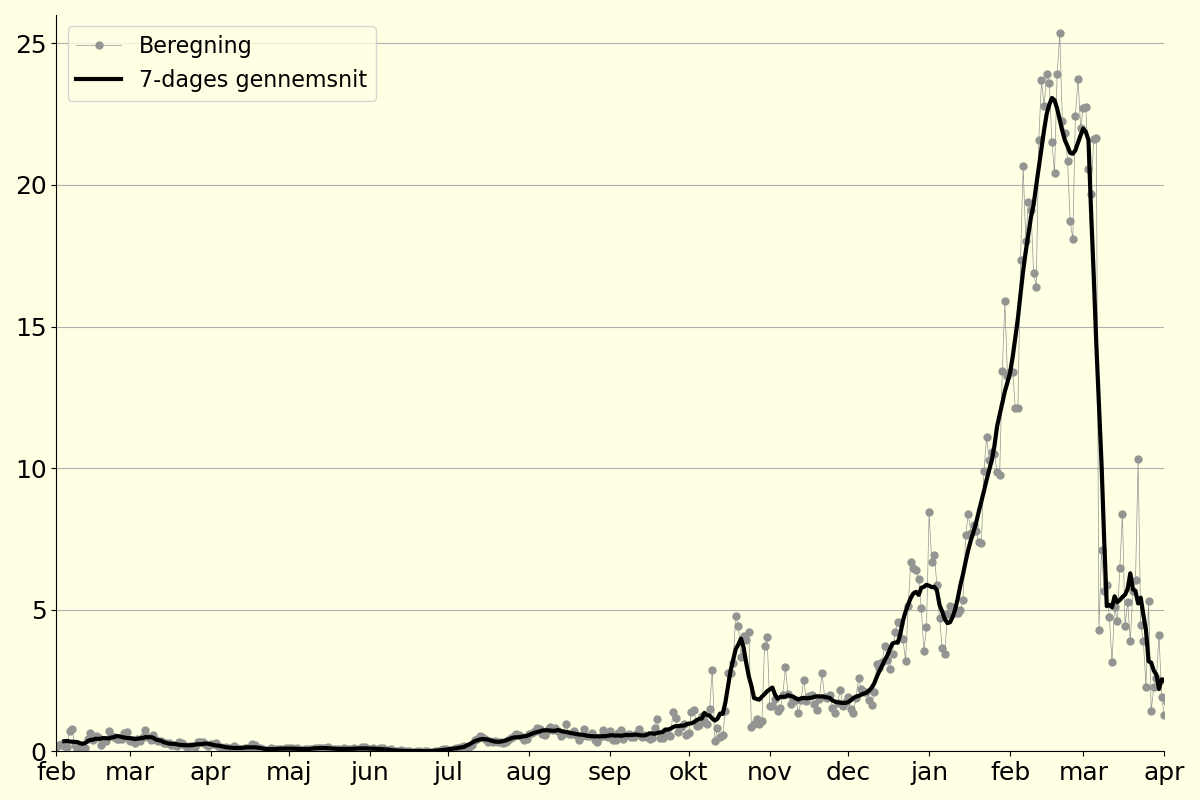

In [52]:
fig,ax = plt.subplots()

ax.plot(curDates,100*posBackground,'.-',lw=0.5,color='xkcd:gray',label='Beregning')
ax.plot(rnTime(curDates,7),rnMean(100*posBackground,7),'k',label='7-dages gennemsnit')

ax.set_xlim(left=curDates[0])
# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2022-04-01'))

ax.legend(loc='upper left')

ax.set_ylim(bottom=0)
ax.set_ylim(top=26)

ax.set_xticks(
    np.arange(
        np.datetime64('2021-02'),
        np.datetime64('2022-05'),
        )
    )

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

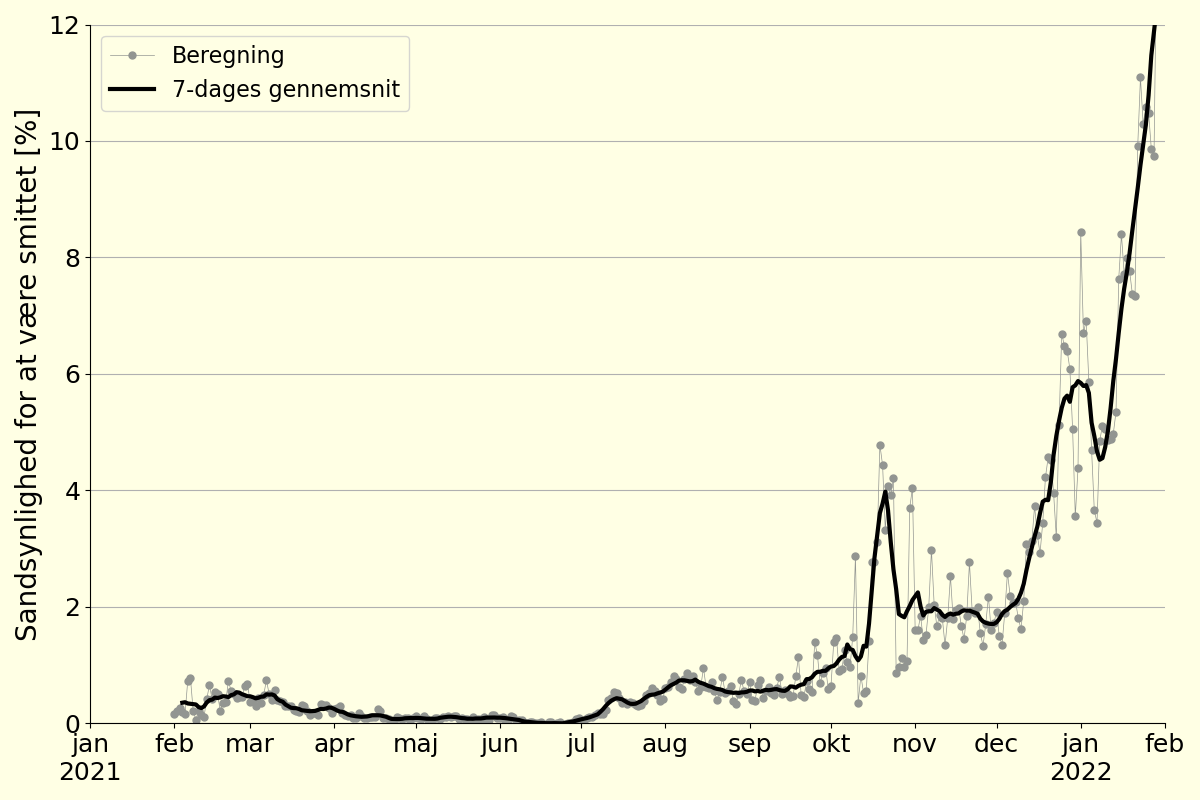

In [72]:
fig,ax = plt.subplots()

ax.plot(curDates,100*posBackground,'.-',lw=0.5,color='xkcd:gray',label='Beregning')
ax.plot(rnTime(curDates,7),rnMean(100*posBackground,7),'k',label='7-dages gennemsnit')

ax.set_xlim(left=curDates[0])
# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2022-04-01'))

ax.legend(loc='upper left')

ax.set_ylim(bottom=0)
ax.set_ylim(top=26)

ax.set_xticks(
    np.arange(
        np.datetime64('2021-01'),
        np.datetime64('2022-05'),
        )
    )

ax.set_ylabel('Sandsynlighed for at være smittet [%]')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ['%b\n%Y',  # ticks are mostly years
                        '%b',       # ticks are mostly months
                        '%d',       # ticks are mostly days
                        '%H:%M',    # hrs
                        '%H:%M',    # min
                        '%S.%f', ]  # secs
# these are mostly just the level above...
formatter.zero_formats = [''] + formatter.formats[:-1]
# ...except for ticks that are mostly hours, then it is nice to have
# month-day:
# formatter.zero_formats[3] = '%d-%b'

formatter.offset_formats = ['',
                            '%Y',
                            '%b %Y',
                            '%d %b %Y',
                            '%d %b %Y',
                            '%d %b %Y %H:%M', ]
# ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Save full figures
if saveFigures:
    fig.savefig(path_figs+'/NatDag2022/AntigenFuld')

# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2021-12-01'))
ax.set_ylim(top=5)
# Save full figures
if saveFigures:
    fig.savefig(path_figs+'/NatDag2022/Antigen2021')

# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2022-02-01'))
ax.set_ylim(top=12)
# Save full figures
if saveFigures:
    fig.savefig(path_figs+'/NatDag2022/Antigen2021ogStart2022')

# ax.set_xlim(left=np.datetime64('2022-04-01'))
# ax.set_xlim(right=np.datetime64('2022-04-01'))
# ax.set_ylim(top=26)

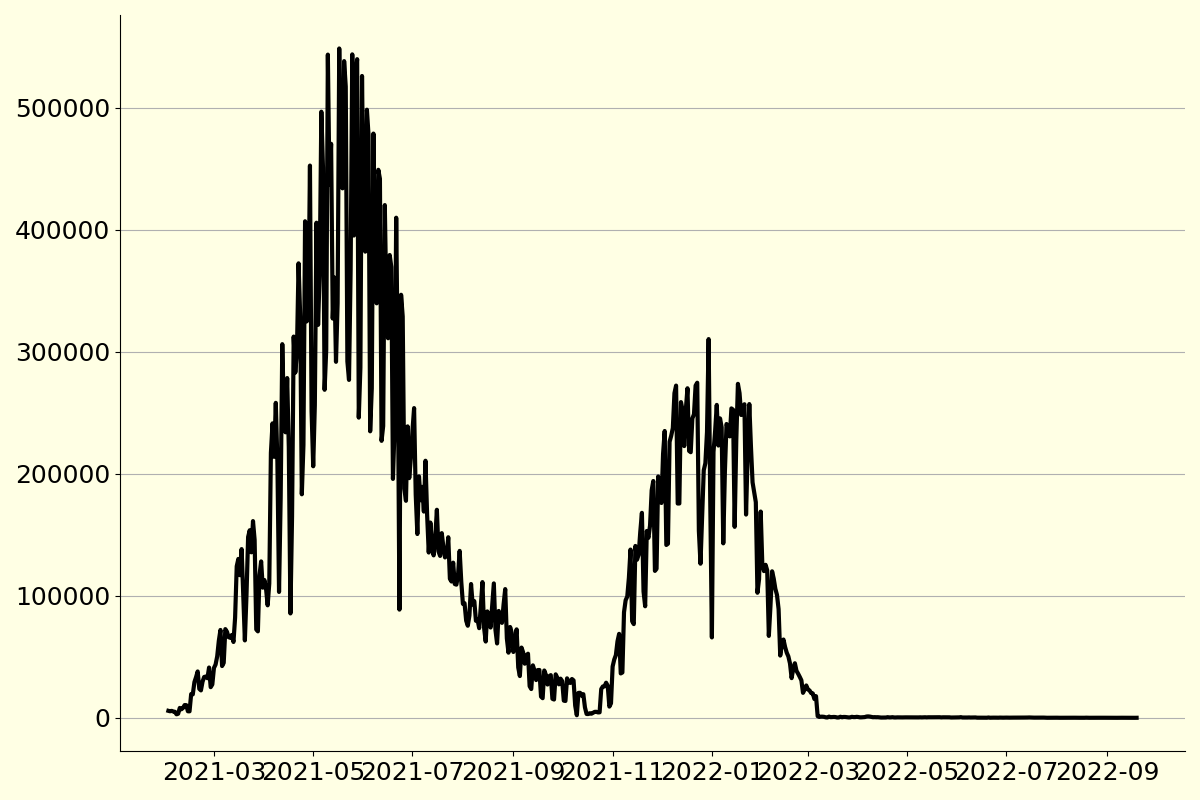

In [74]:
fig,ax = plt.subplots()

ax.plot(df.Dato,df.AG_testede,'k')

# Falsk positiv

In [77]:
df.head()

,Dato,AG_testede,AG_pos,AGpos_PCRkonf,Andel_AGpos_PCRkonf_pct,AGpos_minusPCRkonf,Andel_AGminusPCRkonf_pct,AGpos_PCRpos,AGposPCRneg,AGnegPCRpos,AGnegPCRneg
0,2021-02-01,5742,8,4,50,4,50,2,2,2,294
1,2021-02-02,5373,9,5,"55,5555555555556",4,"44,4444444444444",5,0,5,305
2,2021-02-03,5723,11,6,"54,5454545454545",5,"45,4545454545455",6,0,6,344
3,2021-02-04,5191,8,3,"37,5",5,"62,5",3,0,5,328
4,2021-02-05,4942,7,5,"71,4285714285714",2,"28,5714285714286",4,1,6,280


In [86]:
truePos_wrong = df.AGpos_PCRpos/df.AG_pos
truePos = df.AGpos_PCRpos/(df.AGpos_PCRpos+df.AGposPCRneg)


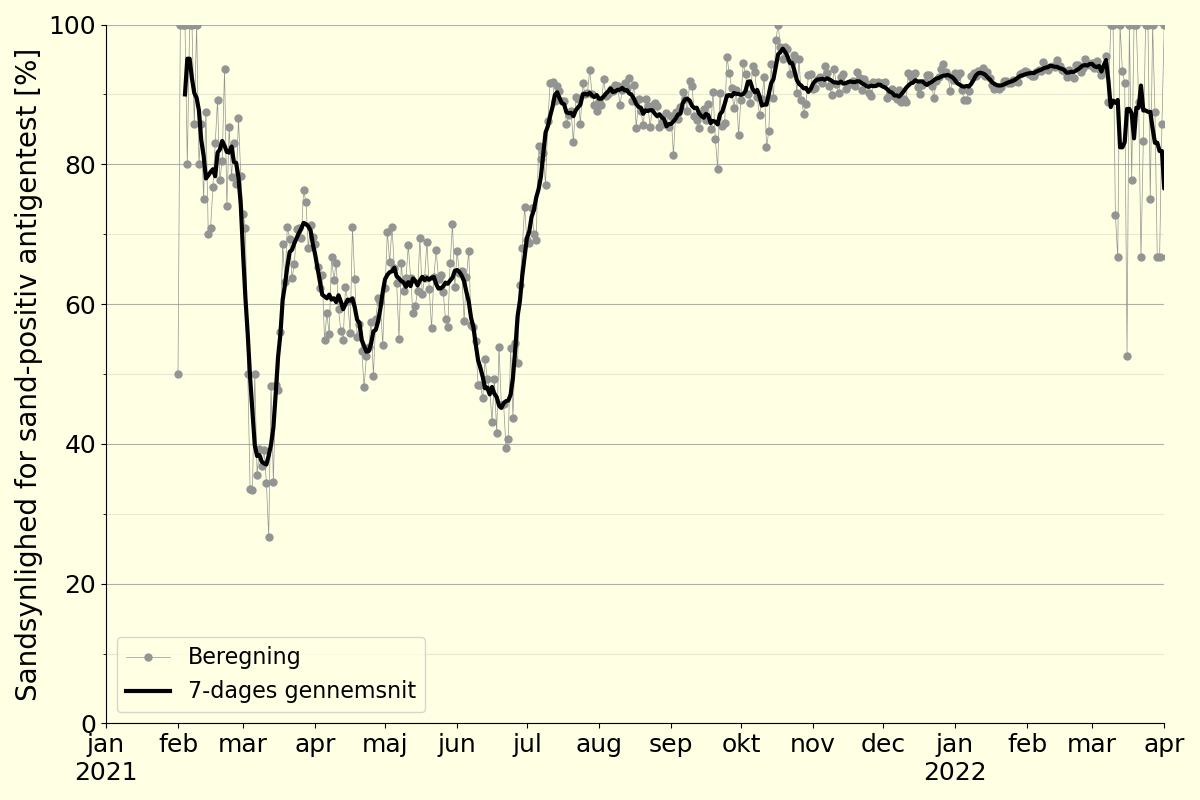

In [112]:
fig,ax = plt.subplots()
ax.plot(curDates,100*truePos,'.-',lw=0.5,color='xkcd:gray',label='Beregning')
ax.plot(rnTime(curDates,7),rnMean(100*truePos,7),'k',label='7-dages gennemsnit')

ax.set_xlim(left=curDates[0])
# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2022-04-01'))

ax.legend(loc='lower left')

ax.set_ylim(bottom=0)
ax.set_ylim(top=100)

ax.set_xticks(
    np.arange(
        np.datetime64('2021-01'),
        np.datetime64('2022-05'),
        )
    )

ax.set_ylabel('Sandsynlighed for sand-positiv antigentest [%]')

ax.xaxis.set_major_formatter(formatter)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.grid(which='minor',color='xkcd:gray',alpha=0.2)

# Save full figures
if saveFigures:
    fig.savefig(path_figs+'/NatDag2022/AntigenTruePos')


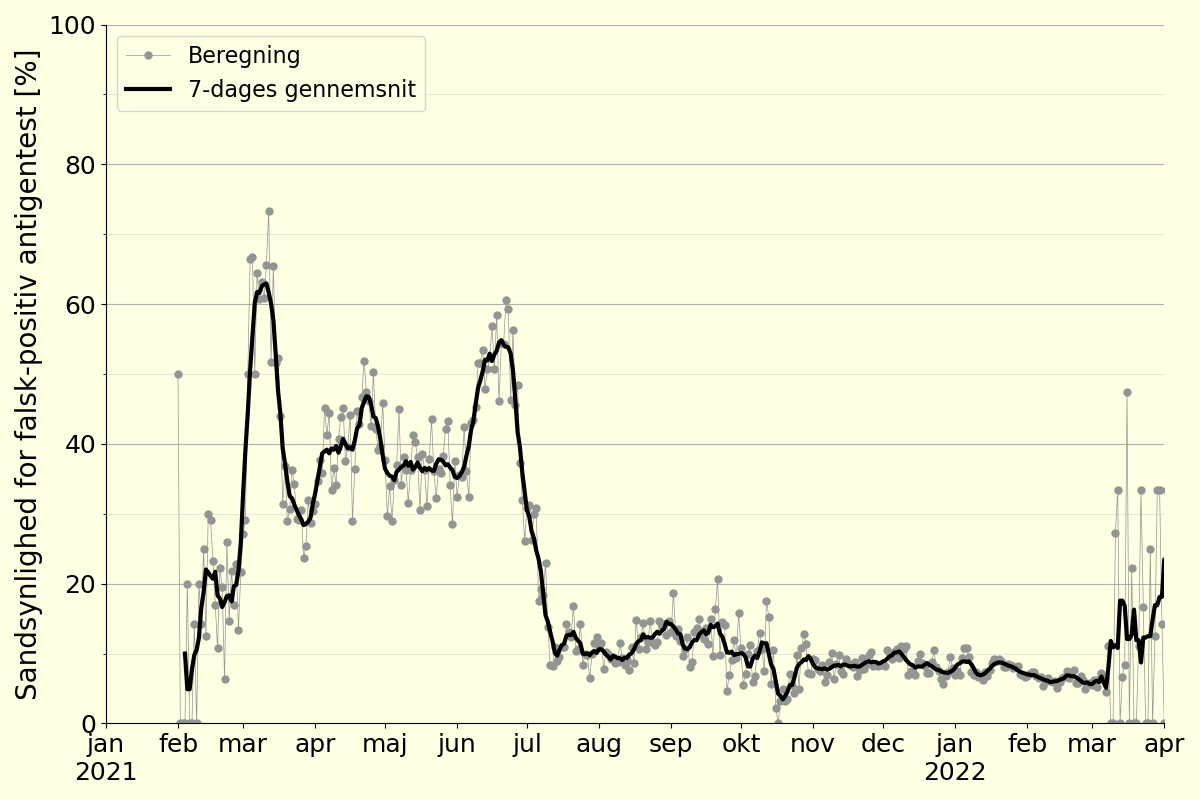

In [113]:
fig,ax = plt.subplots()
ax.plot(curDates,100*(1-truePos),'.-',lw=0.5,color='xkcd:gray',label='Beregning')
ax.plot(rnTime(curDates,7),rnMean(100*(1-truePos),7),'k',label='7-dages gennemsnit')

ax.set_xlim(left=curDates[0])
# ax.set_xlim(left=np.datetime64('2021-01-01'))
ax.set_xlim(right=np.datetime64('2022-04-01'))

ax.legend(loc='upper left')

ax.set_ylim(bottom=0)
ax.set_ylim(top=100)

ax.set_xticks(
    np.arange(
        np.datetime64('2021-01'),
        np.datetime64('2022-05'),
        )
    )



ax.set_ylabel('Sandsynlighed for falsk-positiv antigentest [%]')

ax.xaxis.set_major_formatter(formatter)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.grid(which='minor',color='xkcd:gray',alpha=0.2)

# Save full figures
if saveFigures:
    fig.savefig(path_figs+'/NatDag2022/AntigenFalsePos')
